In [3]:
import gradio as gr
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import io
# import soundfile as sf
# from transformers import pipeline

In [ ]:
# Load speech-to-text and text-to-text models (you might need to replace with actual implementations)
speech_to_text = pipeline("automatic-speech-recognition", model="openai/whisper-base")
text_generator = pipeline("text-generation", model="gpt2")

# Vision Function: Apply Retro TV Effect
def apply_retro_effect(image):
    def pixelate(image, pixel_size=10):
        small = cv2.resize(image, (image.shape[1] // pixel_size, image.shape[0] // pixel_size), interpolation=cv2.INTER_LINEAR)
        pixelated_image = cv2.resize(small, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
        return pixelated_image

    def add_noise(image, amount=0.05):
        noisy_image = image.copy()
        num_salt = int(amount * image.size)
        coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
        noisy_image[coords[0], coords[1], :] = 255  # Salt (white noise)
        coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
        noisy_image[coords[0], coords[1], :] = 0  # Pepper (black noise)
        return noisy_image

    def add_scan_lines(image, line_spacing=5):
        scan_line_image = image.copy()
        for y in range(0, image.shape[0], line_spacing * 2):
            scan_line_image[y:y + line_spacing] = scan_line_image[y:y + line_spacing] // 2
        return scan_line_image

    # Apply the retro effect steps
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = pixelate(image)
    image = add_noise(image)
    image = add_scan_lines(image)
    return image

# Audio Function: Transcribe Speech
def transcribe_audio(audio):
    # Read audio data from Gradio input
    audio_data, samplerate = sf.read(io.BytesIO(audio))
    # Convert audio data to 16-bit for compatibility
    audio_data = (audio_data * 32767).astype(np.int16)
    # Transcribe the audio using speech-to-text pipeline
    transcription = speech_to_text(audio_data, sampling_rate=samplerate)["text"]
    return transcription

# Text Function: Chatbot Response
def generate_text_response(user_input):
    response = text_generator(user_input, max_length=50, num_return_sequences=1)[0]["generated_text"]
    return response


In [4]:

# Dummy Vision Function: Returns a placeholder message
def dummy_vision_function(image):
    return image  # Simply returns the uploaded image as output

# Dummy Audio Function: Returns a static transcription
def dummy_audio_function(audio):
    return "This is a dummy transcription of the audio input."

# Dummy Text Function: Returns a canned response
def dummy_text_function(user_text):
    return "This is a dummy response to your input."


In [17]:
# Gradio Interface
with gr.Blocks(fill_height=True) as demo:
    gr.Markdown("# Virtual Assistant Interface")
    
    with gr.Row():
        # Vision Screen
        with gr.Column(scale=6):
            gr.Markdown("### Vision Screen")
            input_image = gr.Image(label="Upload Image")
            output_image = gr.Image(label="Retro TV Effect")
            input_image.change(dummy_vision_function, inputs=input_image, outputs=output_image)

        with gr.Column(scale=4):
            gr.Markdown("### Text Screen")
            user_text = gr.Textbox(label="Enter Text")
            response_text = gr.Textbox(label="Response")
            user_text.submit(dummy_text_function, inputs=user_text, outputs=response_text)

    with gr.Row():
        # Audio Screen
        with gr.Column():
            gr.Markdown("### Audio Screen")
            audio_input = gr.Audio(type="filepath", label="Record Audio")  # Removed 'source' argument
            transcription_output = gr.Textbox(label="Transcription")
            audio_input.change(dummy_audio_function, inputs=audio_input, outputs=transcription_output)
            
demo.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


### Rainbow retro glitch effect

In [1]:
import numpy as np
import time
import os
from colorama import init, Fore, Back, Style

def generate_binary_matrix(rows, cols):
    """Generate a random binary matrix"""
    return np.random.choice([0, 1], size=(rows, cols))

def get_green_shade(value, position, total_positions):
    """Generate different shades of green based on position"""
    # Creating gradient effect
    intensity = int((position / total_positions) * 255)
    return f"\033[38;2;0;{intensity};0m"

def print_matrix_rainbow(matrix):
    """Print the matrix with rainbow effect in green shades"""
    rows, cols = matrix.shape
    total_positions = rows * cols
    
    # Clear screen
    os.system('cls' if os.name == 'nt' else 'clear')
    
    for i in range(rows):
        for j in range(cols):
            position = i * cols + j
            value = matrix[i][j]
            color = get_green_shade(value, position, total_positions)
            print(f"{color}{value}", end=" ")
        print(Style.RESET_ALL)  # Reset color at end of each row

def animate_matrix(rows=20, cols=40, iterations=100, delay=0.1):
    """Animate the binary matrix with rainbow effect"""
    init()  # Initialize colorama
    
    try:
        while iterations > 0:
            matrix = generate_binary_matrix(rows, cols)
            print_matrix_rainbow(matrix)
            time.sleep(delay)
            iterations -= 1
            
    except KeyboardInterrupt:
        print(Style.RESET_ALL)
        print("\nAnimation stopped by user")
    
    print(Style.RESET_ALL)
    

In [2]:
# Run the animation
animate_matrix(rows=20, cols=40, iterations=100, delay=0.1)

0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 
1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 
1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 
1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 
0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 
0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 
1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 
0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 
0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 
1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 
1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 
1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 
1 1 0 0 1 0 1 0 0 1 1 1 1 1 

### Binary Image

In [3]:
from PIL import Image
import numpy as np

def image_to_binary(image_path, scale_down=True, max_width=100):
    # Load and convert the image to grayscale
    image = Image.open(image_path).convert("L")

    # Optionally scale down the image to fit within max_width
    if scale_down and image.width > max_width:
        aspect_ratio = image.height / image.width
        new_height = int(max_width * aspect_ratio)
        image = image.resize((max_width, new_height))
    
    # Convert the image to a numpy array
    pixels = np.array(image)

    # Convert each pixel to an 8-bit binary string
    binary_representation = [[format(pixel, '08b') for pixel in row] for row in pixels]
    
    # Print the binary representation (or use it as needed)
    for row in binary_representation:
        print(" ".join(row))

# Example usage
image_path = "Andy Samberg.jpeg"
image_to_binary(image_path)


00011000 00011001 00010100 00010010 00010100 00010010 00010010 00010000 00010000 00010011 00010000 00001110 00001111 00001110 00010000 00010001 00001100 00001110 00001100 00001011 00001101 00001100 00001100 00001010 00001011 00001011 00001110 00001011 00001011 00001010 00001010 00001001 00000111 00001010 00001001 00001000 00001001 00001011 00001010 00001101 00001111 00010001 00010010 00011001 00011010 00011110 00011111 00100001 00100100 00101011 00110000 00110001 00110111 00111010 00111101 00111110 01000101 01001110 01010001 01010110 01011000 01011011 01011100 01011101 01011011 01011011 01100010 01101100 01101111 01101111 01100110 01100100 01101111 01110000 01110100 01111101 10000001 10000011 10001101 10001001 10000110 10010000 10010010 10010101 10011001 10100000 10100001 10100011 10100100 10011100 10100011 10101100 10101101 10101011 10110000 10110101 10110011 10111000 10111011 10110111
00011000 00011000 00010101 00010000 00001111 00010010 00010010 00010000 00010010 00010010 00010001 0

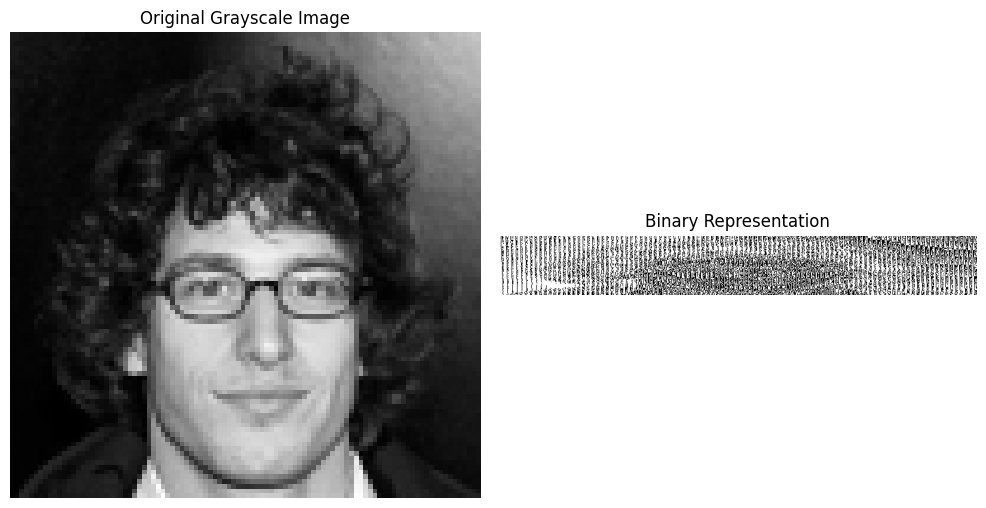

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def image_to_binary_representation(image_path, max_width=100):
    # Load and convert the image to grayscale
    image = Image.open(image_path).convert("L")

    # Scale down the image to fit within max_width
    if image.width > max_width:
        aspect_ratio = image.height / image.width
        new_height = int(max_width * aspect_ratio)
        image = image.resize((max_width, new_height))

    # Convert the image to a numpy array
    pixels = np.array(image)

    # Create the binary representation by converting each pixel to an 8-bit binary string
    binary_representation = [[format(pixel, '08b') for pixel in row] for row in pixels]
    
    # Prepare a figure to plot both the original and binary images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original grayscale image
    axs[0].imshow(pixels, cmap="gray")
    axs[0].set_title("Original Grayscale Image")
    axs[0].axis("off")

    # Generate a "binary image" by formatting the binary text grid
    # Turn each binary pixel string into an 8x8 grid of 0s and 1s
    binary_pixels = np.array([[int(bit) for bits in row for bit in bits] for row in binary_representation])

    # Reshape the binary_pixels for visualization
    binary_pixels = binary_pixels.reshape((pixels.shape[0], pixels.shape[1] * 8))

    # Display the binary "image" representation
    axs[1].imshow(binary_pixels, cmap="binary")
    axs[1].set_title("Binary Representation")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "Andy Samber.jpeg"
image_to_binary_representation(image_path)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5024 - loss: 0.693 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5024 - loss: 0.6932
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.9878 - loss: 0.65 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - accuracy: 0.9878 - loss: 0.6542
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 1.0000 - loss: 0.58 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 1.0000 - loss: 0.5804
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 1.0000 - loss: 0.45 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 1.0000 - loss: 0.4585
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 1.0000 - loss: 0.29 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 1.0000 - loss: 0.2934
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 1.0000 - loss: 0.12 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - accuracy: 1.0000 - loss: 0.1293
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 1.0000 - loss: 0.03 ━━━━━━━━━━━━━━━━━

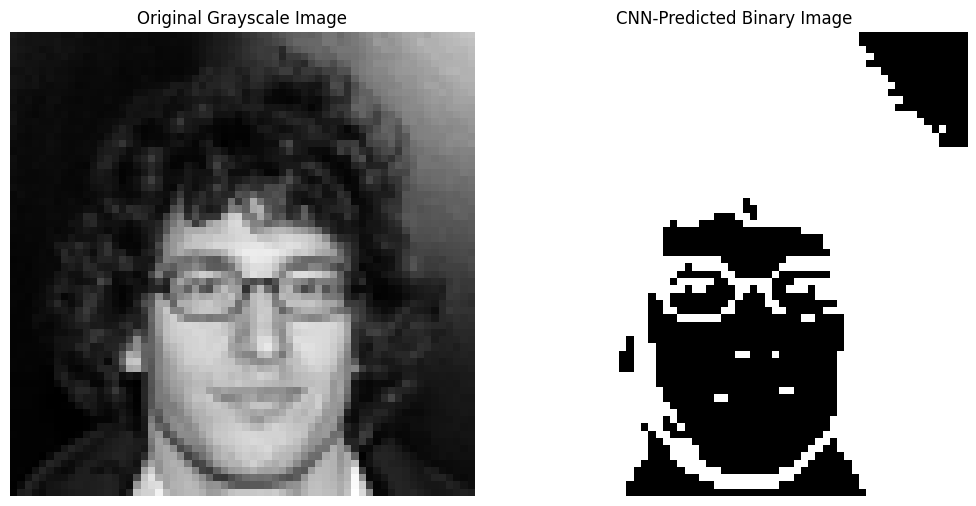

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Reshape
from tensorflow.keras.models import Sequential
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
def load_and_preprocess_image(image_path, img_size=64):
    # Load image, convert to grayscale, and resize
    image = Image.open(image_path).convert("L").resize((img_size, img_size))
    image_array = np.array(image) / 255.0  # Normalize pixel values to 0-1

    # Create binary target by thresholding at 0.5
    binary_target = (image_array > 0.5).astype(np.float32)  # Threshold for binary output

    # Reshape for CNN input
    image_array = image_array.reshape((img_size, img_size, 1))  # Add channel dimension
    binary_target = binary_target.reshape((img_size, img_size, 1))  # Add channel dimension
    
    return image_array, binary_target

# Define the CNN model architecture
def build_binary_cnn_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(input_shape[0] * input_shape[1], activation="sigmoid"),
        Reshape(input_shape)  # Reshape to original image size for pixel-by-pixel prediction
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Load and preprocess the image
image_path = "Andy Samber.jpeg"
img_size = 64  # Size to which the image will be resized
image_array, binary_target = load_and_preprocess_image(image_path, img_size)

# Build and train the model
model = build_binary_cnn_model(input_shape=(img_size, img_size, 1))
model.fit(image_array[np.newaxis, ...], binary_target[np.newaxis, ...], epochs=10, verbose=1)

# Predict binary image
binary_prediction = model.predict(image_array[np.newaxis, ...])[0]
binary_prediction = (binary_prediction > 0.5).astype(np.uint8)  # Convert probabilities to binary values

# Display original and binary images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original grayscale image
axs[0].imshow(image_array.squeeze(), cmap="gray")
axs[0].set_title("Original Grayscale Image")
axs[0].axis("off")

# Binary prediction image
axs[1].imshow(binary_prediction.squeeze(), cmap="binary")
axs[1].set_title("CNN-Predicted Binary Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()


C:\Users\91789\anaconda3\envs\vbva\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\91789\anaconda3\envs\vbva\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.3140 - loss: 0.69 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3140 - loss: 0.6941
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7656 - loss: 0.68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7656 - loss: 0.6805  
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7656 - loss: 0.664 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6640
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.7656 - loss: 0.64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.6475  
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7656 - loss: 0.61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7656 - loss: 0.6117  
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7666 - loss: 0.55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7666 - loss: 0.5520  
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8462 - loss: 0.46 ━━━━━━━━━━━━━━━━━

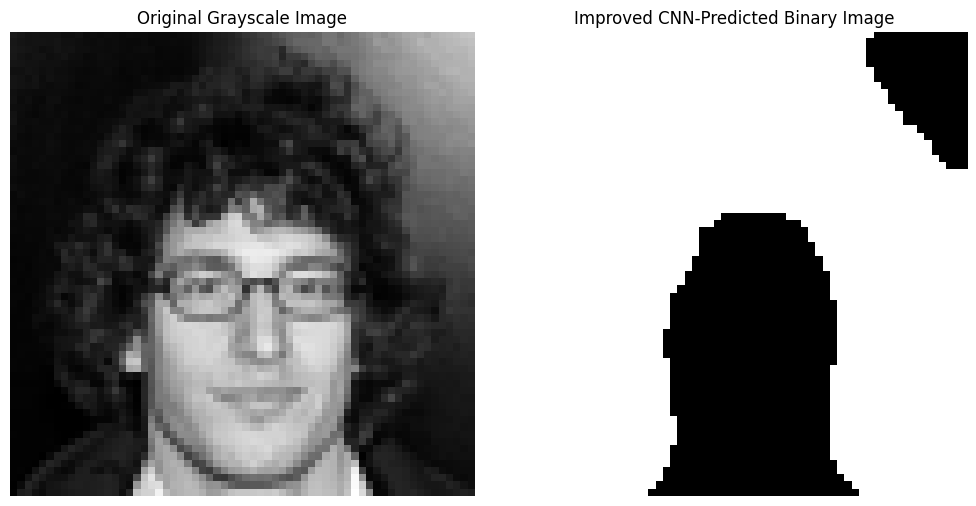

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Reshape, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, img_size=64):
    # Load image, convert to grayscale, and resize
    image = Image.open(image_path).convert("L").resize((img_size, img_size))
    image_array = np.array(image) / 255.0  # Normalize pixel values to 0-1

    # Create binary target by thresholding at 0.5
    binary_target = (image_array > 0.5).astype(np.float32)  # Threshold for binary output

    # Reshape for CNN input
    image_array = image_array.reshape((img_size, img_size, 1))  # Add channel dimension
    binary_target = binary_target.reshape((img_size, img_size, 1))  # Add channel dimension
    
    return image_array, binary_target

def build_binary_cnn_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        UpSampling2D(size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        UpSampling2D(size=(2, 2)),
        Conv2D(1, kernel_size=(3, 3), activation="sigmoid", padding="same")  # Final layer with sigmoid
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Load and preprocess the image
image_path = "Andy Samber.jpeg"
img_size = 64  # Resize image
image_array, binary_target = load_and_preprocess_image(image_path, img_size)

# Create data generator with slight augmentations for better generalization
datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.05, height_shift_range=0.05)
datagen.fit(image_array[np.newaxis, ...])

# Build the CNN model
model = build_binary_cnn_model(input_shape=(img_size, img_size, 1))

# Train the model with augmented data
model.fit(datagen.flow(image_array[np.newaxis, ...], binary_target[np.newaxis, ...], batch_size=1),
          epochs=15, steps_per_epoch=5, verbose=1)

# Predict the binary image
binary_prediction = model.predict(image_array[np.newaxis, ...])[0]
binary_prediction = (binary_prediction > 0.5).astype(np.uint8)  # Threshold predictions to binary

# Display original and binary images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original grayscale image
axs[0].imshow(image_array.squeeze(), cmap="gray")
axs[0].set_title("Original Grayscale Image")
axs[0].axis("off")

# Binary prediction image
axs[1].imshow(binary_prediction.squeeze(), cmap="binary")
axs[1].set_title("Improved CNN-Predicted Binary Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()


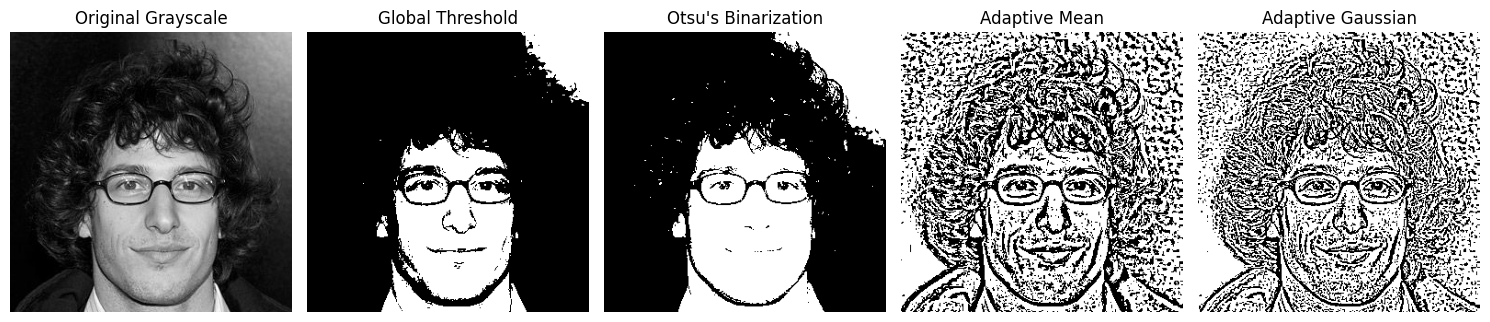

In [14]:
import cv2
import matplotlib.pyplot as plt

def convert_to_binary(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image is loaded properly
    if image is None:
        raise ValueError("Image not found or unable to open the image file.")
    
    # Global Thresholding (Simple Binary Threshold)
    _, binary_global = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
    # Otsu's Binarization (Automatic threshold calculation)
    _, binary_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Adaptive Mean Thresholding
    binary_adaptive_mean = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    # Adaptive Gaussian Thresholding
    binary_adaptive_gaussian = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    # Display the results
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Grayscale")
    axs[0].axis("off")

    axs[1].imshow(binary_global, cmap='gray')
    axs[1].set_title("Global Threshold")
    axs[1].axis("off")

    axs[2].imshow(binary_otsu, cmap='gray')
    axs[2].set_title("Otsu's Binarization")
    axs[2].axis("off")

    axs[3].imshow(binary_adaptive_mean, cmap='gray')
    axs[3].set_title("Adaptive Mean")
    axs[3].axis("off")

    axs[4].imshow(binary_adaptive_gaussian, cmap='gray')
    axs[4].set_title("Adaptive Gaussian")
    axs[4].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "Andy Samber.jpeg"
convert_to_binary(image_path)


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_to_binary(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image is loaded properly
    if image is None:
        raise ValueError("Image not found or unable to open the image file.")
    
    # Global Thresholding (Simple Binary Threshold) - result as 0 and 1
    _, binary_global = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    binary_global_01 = (binary_global // 255).astype(np.uint8)  # Convert to 0 and 1
    
    # Adaptive Gaussian Thresholding - result as 0 and 1
    binary_adaptive_gaussian = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    binary_adaptive_gaussian_01 = (binary_adaptive_gaussian // 255).astype(np.uint8)  # Convert to 0 and 1
    
    # Display the results
    fig, axs = plt.subplots(1, 4, figsize=(100, 80))
    
    # Original grayscale image
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Grayscale")
    axs[0].axis("off")

    # Global Threshold (0 and 1 format)
    axs[1].imshow(binary_global_01, cmap='binary')
    axs[1].set_title("Global Threshold (0-1)")
    axs[1].axis("off")

    # Display arrays for validation (optional)
    print("Global Threshold (0-1 format):\n", binary_global_01)
    print("Adaptive Gaussian Threshold (0-1 format):\n", binary_adaptive_gaussian_01)

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "Andy Samber.jpeg"
convert_to_binary(image_path)


Global Threshold (0-1 format):
 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Adaptive Gaussian Threshold (0-1 format):
 [[0 1 1 ... 0 0 0]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 0 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 [1 1 0 ... 1 1 1]]


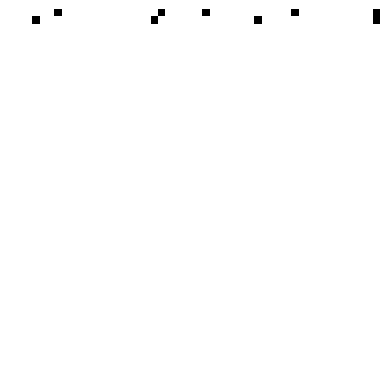

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set grid size
rows, cols = 50, 50
grid = np.zeros((rows, cols), dtype=np.uint8)

# Initialize the figure
fig, ax = plt.subplots()
ax.axis("off")
im = ax.imshow(grid, cmap="binary", vmin=0, vmax=1)

# Function to update the grid at each frame
def update(*args):
    global grid
    # Create new "rain" at the top row with random density
    new_rain = np.random.choice([0, 1], size=(1, cols), p=[0.9, 0.1])
    
    # Shift the grid down by 1 row and add new rain at the top
    grid = np.vstack([new_rain, grid[:-1, :]])
    
    # Update the image data for the current frame
    im.set_data(grid)
    return [im]

# Run the animation
ani = animation.FuncAnimation(fig, update, frames=200, interval=50, blit=True)
plt.show()


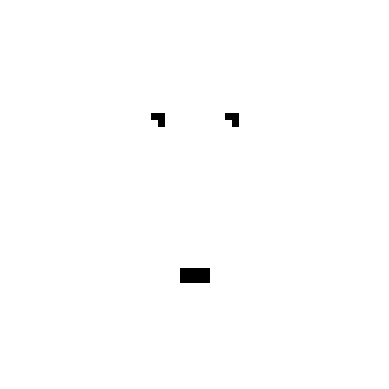

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Grid size
rows, cols = 50, 50
face_grid = np.zeros((rows, cols), dtype=np.uint8)

# Define static face features (eyes)
face_grid[15, 20] = face_grid[15, 30] = 1  # Eyes
face_grid[14, 19:21] = face_grid[14, 29:31] = 1  # Eye brows

# Define different mouth shapes (closed, half-open, open)
mouth_frames = [
    (slice(35, 37), slice(23, 27)),  # Closed
    (slice(34, 38), slice(22, 28)),  # Half-open
    (slice(33, 39), slice(21, 29))   # Fully open
]

# Initialize figure
fig, ax = plt.subplots()
ax.axis("off")
im = ax.imshow(face_grid, cmap="binary", vmin=0, vmax=1)

# Update function for each frame
def update(frame):
    global face_grid
    # Clear previous mouth area
    face_grid[33:39, 21:29] = 0
    
    # Apply current mouth frame
    mouth_area = mouth_frames[frame % len(mouth_frames)]
    face_grid[mouth_area] = 1
    
    # Update the image data for the current frame
    im.set_data(face_grid)
    return [im]

# Run the animation
ani = animation.FuncAnimation(fig, update, frames=60, interval=200, blit=True)
plt.show()


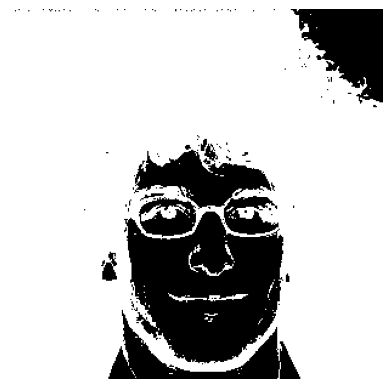

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def convert_to_binary(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image is loaded properly
    if image is None:
        raise ValueError("Image not found or unable to open the image file.")
    
    # Global Thresholding to create a binary face outline
    _, binary_face = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    binary_face = (binary_face // 255).astype(np.uint8)  # Convert to 0 and 1
    return binary_face

def update(frame, face_grid, im, rain_density):
    # Create a new matrix rain row with random density
    rain_row = np.random.choice([0, 1], size=face_grid.shape[1], p=[1 - rain_density, rain_density])
    
    # Shift the rain downwards by 1 row
    face_grid[1:] = face_grid[:-1]  # Move all rows down
    face_grid[0] = rain_row  # Add new rain row at the top
    
    # Overlay face onto the matrix rain
    combined_grid = np.maximum(face_grid, face_outline)  # Face appears over rain

    # Update the image data for the current frame
    im.set_data(combined_grid)
    return [im]

# Load binary face
image_path = "Andy Samber.jpeg"
face_outline = convert_to_binary(image_path)

# Initialize figure and grid
fig, ax = plt.subplots()
ax.axis("off")

# Set up matrix rain effect
rain_density = 0.1  # Adjust to control rain density
face_grid = np.zeros_like(face_outline)  # Start with an empty rain grid

# Initialize the plot with face overlay
im = ax.imshow(np.maximum(face_grid, face_outline), cmap="binary", vmin=0, vmax=1)

# Run the animation
ani = animation.FuncAnimation(
    fig, update, frames=200, fargs=(face_grid, im, rain_density), interval=50, blit=True
)
plt.show()


In [7]:
import pygame
import random
import sys
import cv2
import numpy as np

# Initialize pygame
pygame.init()

# Screen dimensions
SCREEN_WIDTH = 1920
SCREEN_HEIGHT = 1080

# Colors
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
BRIGHT_GREEN = (144, 238, 144)
YELLOW = (255, 255, 0)
WHITE = (255, 255, 255)
GLITCH_GREEN = (0, random.randint(150, 255), 0)

# Font settings
FONT_SIZE = 20
font = pygame.font.SysFont("Courier", FONT_SIZE, bold=True)

# Screen setup
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Binary Rain with Face Effect and Enhanced Motion")

# Load and crop the face mask image
def load_and_crop_image(image_path, crop_height):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or unable to open the image file.")
    # Crop the upper part of the image
    cropped_image = image[crop_height:, :]  # Cropping from the top
    rotated_image = cv2.rotate(cropped_image, cv2.ROTATE_90_CLOCKWISE)
    rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
    rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
    return cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGBA)  # Convert to RGBA for Pygame

# Load and convert face mask image to binary format
def load_face_mask(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
    if image is None:
        raise ValueError("Image not found or unable to open the image file.")
    
    # Apply binary thresholding
    _, binary_face = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    binary_face = (binary_face // 255).astype(np.uint8)  # Convert to 0 and 1
    return binary_face

# Load the face mask and convert it to binary
face_mask_image = load_and_crop_image("Andy Samber.jpeg", crop_height=50)  # Crop 50 pixels from the top
face_mask_binary = load_face_mask(face_mask_image)

# Convert binary mask to a Pygame surface
face_mask = pygame.surfarray.make_surface(np.dstack([face_mask_binary * 255]*3))  # Convert 0s and 1s to RGB
face_mask = pygame.transform.scale(face_mask, (SCREEN_WIDTH, SCREEN_HEIGHT))

# Generate binary rain columns
columns = int(SCREEN_WIDTH / FONT_SIZE)
drops = [0] * columns  # Tracks position of each drop in each column

# Glitch overlay for screen glitches
glitch_overlay = pygame.Surface((SCREEN_WIDTH, SCREEN_HEIGHT), pygame.SRCALPHA)
glitch_overlay.set_alpha(50)

# Background fade effect
fade_speed = 0.5
background_intensity = 0
intensity_increasing = True

# Main loop
clock = pygame.time.Clock()
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    background_color = (0, int(background_intensity), 0)
    screen.fill(background_color)

    if intensity_increasing:
        background_intensity += fade_speed
        if background_intensity >= 50:
            intensity_increasing = False
    else:
        background_intensity -= fade_speed
        if background_intensity <= 0:
            intensity_increasing = True

    # Draw the binary rain
    for i in range(columns):
        num_chars = random.randint(5, 20)
        
        for j in range(num_chars):
            char = random.choice(["0", "1"])
            color = GREEN
            
            if random.random() < 0.02:
                color = BRIGHT_GREEN
            elif random.random() < 0.01:
                color = YELLOW

            char_surface = font.render(char, True, color)

            x_pos = i * FONT_SIZE
            y_pos = (drops[i] + j) * FONT_SIZE

            # Only display character if it's within the face outline in the mask
            # if y_pos % SCREEN_HEIGHT < face_mask_binary.shape[0] and x_pos % SCREEN_WIDTH < face_mask_binary.shape[1]:
            #     if face_mask_binary[y_pos % SCREEN_HEIGHT, x_pos % SCREEN_WIDTH] > 0:
            #         screen.blit(char_surface, (x_pos, y_pos))

            if y_pos < SCREEN_HEIGHT and x_pos < SCREEN_WIDTH:
                if face_mask_binary[y_pos % face_mask_binary.shape[0], x_pos % face_mask_binary.shape[1] ] > 0:
                    screen.blit(char_surface, (x_pos, y_pos))
                    
        if drops[i] * FONT_SIZE > SCREEN_HEIGHT or random.random() > 0.95:
            drops[i] = 0
        else:
            drops[i] += 1

    if random.random() < 0.07:
        glitch_overlay.fill((0, 0, 0, 0))
        for _ in range(random.randint(10, 30)):
            rect_width = random.randint(50, 300)
            rect_height = random.randint(10, 50)
            rect_x = random.randint(0, SCREEN_WIDTH - rect_width)
            rect_y = random.randint(0, SCREEN_HEIGHT - rect_height)
            pygame.draw.rect(glitch_overlay, GLITCH_GREEN, (rect_x, rect_y, rect_width, rect_height))
        for _ in range(random.randint(5, 10)):
            line_y = random.randint(0, SCREEN_HEIGHT)
            pygame.draw.line(glitch_overlay, GLITCH_GREEN, (0, line_y), (SCREEN_WIDTH, line_y), random.randint(1, 3))
        screen.blit(glitch_overlay, (0, 0))

    if random.random() < 0.02:
        flicker_overlay = pygame.Surface((SCREEN_WIDTH, SCREEN_HEIGHT), pygame.SRCALPHA)
        flicker_overlay.fill((WHITE[0], WHITE[1], WHITE[2], random.randint(30, 100)))
        screen.blit(flicker_overlay, (0, 0))

    # Draw the face mask over the rain
    screen.blit(face_mask, (0, 0))

    pygame.display.flip()
    clock.tick(30)


SystemExit: 

In [3]:
import pygame
import random
import sys
import cv2
import numpy as np

# Initialize pygame
pygame.init()

# Screen dimensions
SCREEN_WIDTH = 1920
SCREEN_HEIGHT = 1080

# Colors
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
BRIGHT_GREEN = (144, 238, 144)
YELLOW = (255, 255, 0)

# Font settings
FONT_SIZE = 20
font = pygame.font.SysFont("Courier", FONT_SIZE, bold=True)

# Load and crop the face mask image
def load_and_crop_image(image_path, crop_height):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or unable to open the image file.")
    # Crop the upper part of the image
    cropped_image = image[crop_height:, :]  # Cropping from the top
    return cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGBA)  # Convert to RGBA for Pygame

# Convert image to binary representation
def convert_to_binary(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    binary_image_01 = (binary_image // 255).astype(np.uint8)  # Convert to 0 and 1
    return binary_image_01

# Load and prepare the face mask
face_mask_image = load_and_crop_image("Andy Samber.jpeg", crop_height=50)  # Crop 50 pixels from the top
face_mask_binary = convert_to_binary(face_mask_image)

# Screen setup
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Binary Rain with Face Effect and Enhanced Motion")

# Generate binary rain columns
columns = int(SCREEN_WIDTH / FONT_SIZE)
drops = [0] * columns  # Tracks position of each drop in each column

# Main loop
clock = pygame.time.Clock()
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    screen.fill(BLACK)

    # Draw the binary rain
    for i in range(columns):
        num_chars = random.randint(5, 20)
        
        for j in range(num_chars):
            char = random.choice(["0", "1"])
            color = GREEN
            
            if random.random() < 0.02:
                color = BRIGHT_GREEN
            elif random.random() < 0.01:
                color = YELLOW

            char_surface = font.render(char, True, color)

            x_pos = i * FONT_SIZE
            y_pos = (drops[i] + j) * FONT_SIZE

            # Only display character if it's within the face outline in the mask
            # Ensure indices are within bounds
            if y_pos % SCREEN_HEIGHT < face_mask_binary.shape[0] and x_pos % SCREEN_WIDTH < face_mask_binary.shape[1]:
                if face_mask_binary[y_pos % SCREEN_HEIGHT, x_pos % SCREEN_WIDTH] > 0:
                    screen.blit(char_surface, (x_pos, y_pos))

        if drops[i] * FONT_SIZE > SCREEN_HEIGHT or random.random() > 0.95:
            drops[i] = 0
        else:
            drops[i] += 1

    pygame.display.flip()
    clock.tick(30)


SystemExit: 

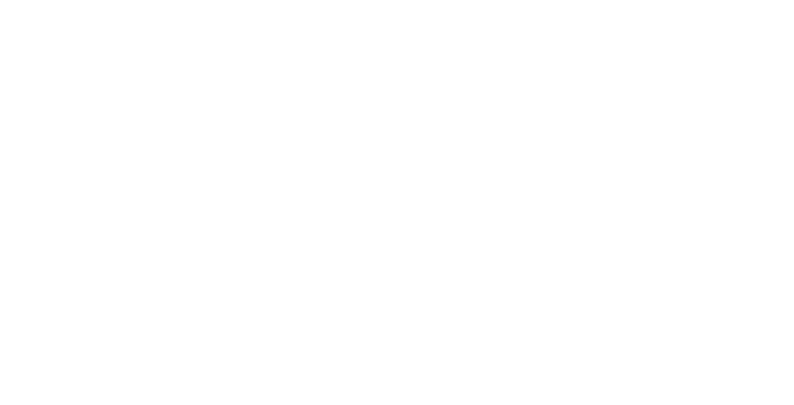

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Screen dimensions
SCREEN_WIDTH = 40  # Number of columns
SCREEN_HEIGHT = 20  # Number of rows

# Colors
BACKGROUND_COLOR = (0, 0, 0)  # Black
BINARY_COLOR = (0, 1, 0)  # Bright green

# Initialize a matrix with random binary values
matrix = np.random.choice([0, 1], size=(SCREEN_HEIGHT, SCREEN_WIDTH))

# Create a figure and axes for the animation
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, SCREEN_WIDTH)
ax.set_ylim(0, SCREEN_HEIGHT)
ax.set_facecolor(BACKGROUND_COLOR)
ax.axis('off')  # Turn off the axes

# Text object to hold the binary characters
text = ax.text(0, 0, '', fontsize=15, color=BINARY_COLOR)

# Update function for animation
def update(frame):
    global matrix
    # Shift the matrix down
    matrix = np.roll(matrix, 1, axis=0)
    
    # Randomly generate new characters at the top
    new_chars = np.random.choice([0, 1], size=(1, SCREEN_WIDTH))
    matrix[0, :] = new_chars
    
    # Create a string representation of the matrix
    display_matrix = '\n'.join([''.join(map(str, row)) for row in matrix])
    
    # Update the text object
    text.set_text(display_matrix)

# Create the animation
ani = FuncAnimation(fig, update, frames=100, interval=100)

# Show the animation
plt.show()


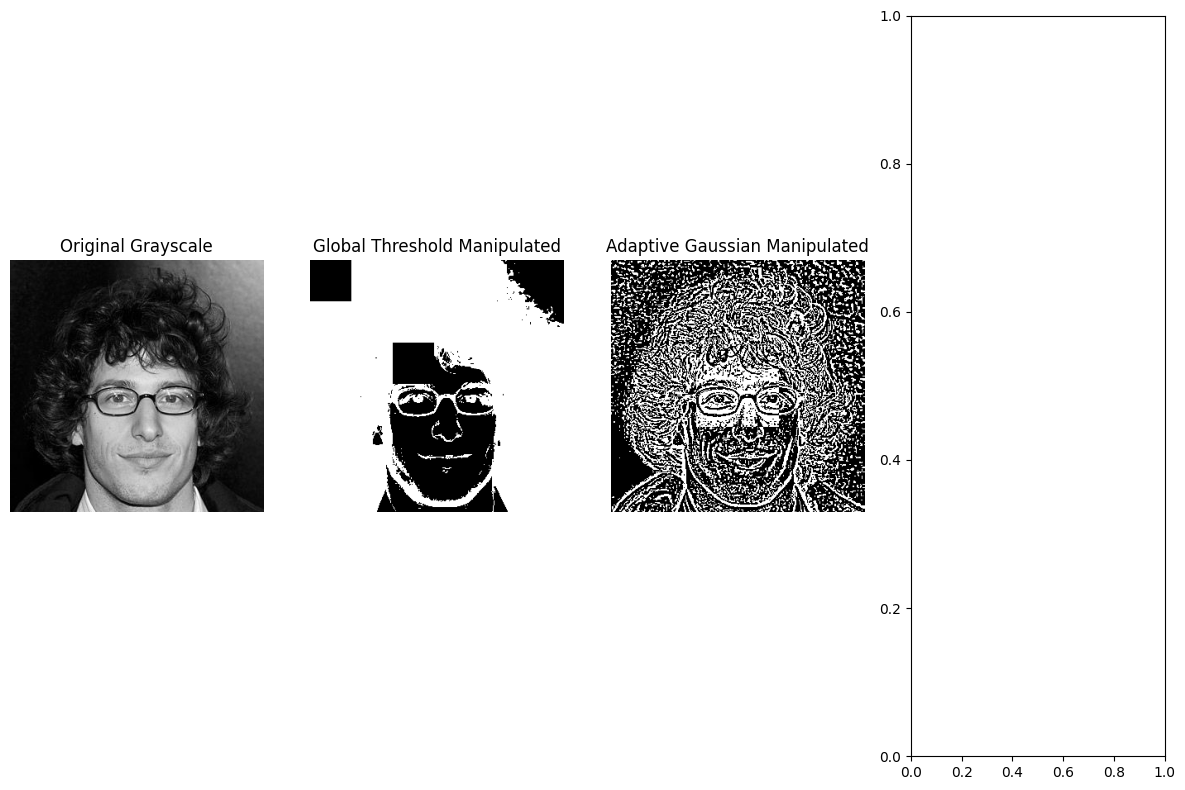

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_to_binary_and_manipulate(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image is loaded properly
    if image is None:
        raise ValueError("Image not found or unable to open the image file.")
    
    # Global Thresholding - result as 0 and 1
    _, binary_global = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    binary_global_01 = (binary_global // 255).astype(np.uint8)  # Convert to 0 and 1
    
    # Adaptive Gaussian Thresholding - result as 0 and 1
    binary_adaptive_gaussian = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    binary_adaptive_gaussian_01 = (binary_adaptive_gaussian // 255).astype(np.uint8)  # Convert to 0 and 1

    ### Pixel Manipulation on Binary Images ###
    
    # 1. Invert pixels in the upper left 50x50 region
    binary_global_01[:50, :50] = 1 - binary_global_01[:50, :50]  # Inverts 0s to 1s and vice versa
    
    # 2. Apply a custom filter to flip the center 100x100 region in the adaptive thresholded image
    center_x, center_y = binary_adaptive_gaussian_01.shape[1] // 2, binary_adaptive_gaussian_01.shape[0] // 2
    binary_adaptive_gaussian_01[center_y-50:center_y+50, center_x-50:center_x+50] = 1 - binary_adaptive_gaussian_01[center_y-50:center_y+50, center_x-50:center_x+50]
    
    # 3. Highlight a rectangular region in the global thresholded image
    binary_global_01[100:150, 100:150] = 1  # Set pixels to 1 in this region (white in binary)

    # Display the results
    fig, axs = plt.subplots(1, 4, figsize=(12, 8))
    
    # Original grayscale image
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original Grayscale")
    axs[0].axis("off")

    # Global Threshold with Manipulations (0 and 1 format)
    axs[1].imshow(binary_global_01, cmap='binary')
    axs[1].set_title("Global Threshold Manipulated")
    axs[1].axis("off")

    # Adaptive Gaussian Threshold with Manipulations (0 and 1 format)
    axs[2].imshow(binary_adaptive_gaussian_01, cmap='binary')
    axs[2].set_title("Adaptive Gaussian Manipulated")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "Andy Samber.jpeg"
convert_to_binary_and_manipulate(image_path)


C:\Users\91789\anaconda3\envs\vbva\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


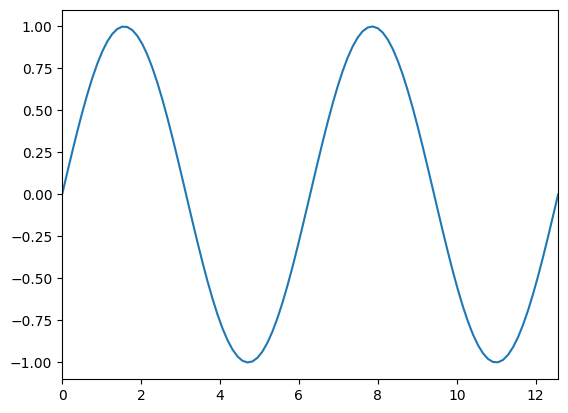

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and axis
fig, ax = plt.subplots()
x_data = np.linspace(0, 4 * np.pi, 100)  # x-axis data
line, = ax.plot(x_data, np.sin(x_data))  # initial line setup

# Set axis limits
ax.set_xlim(0, 4 * np.pi)
ax.set_ylim(-1.1, 1.1)

# Update function that will be called by FuncAnimation for each frame
def update(frame):
    # Update the y-data with a phase shift based on the frame count
    line.set_ydata(np.sin(x_data + frame / 10.0))
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=50, blit=True)

plt.show()
